# Text Analysis Homework 1

Aadithya Anandaraj, LaShay Fontenot, Haritha Maheshkumar, Catherine Miao, Sijo VM

Files to attach : text_clean, attributes, aspirational words

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk import FreqDist

## Scraper

Code below was run in Colab to pull from the Mid Size Sedan forum : https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p1

In [4]:
!pip install selenium
# !apt-get -q update # to update ubuntu to correctly run apt install
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
driver = webdriver.Chrome('chromedriver', options=chrome_options)
# driver.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/')

comments = pd.DataFrame(columns = ['Date','user_id','comments'])

for i in range(20,50):
  driver.get('https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0/p'+str(i))
  for j in range(1,50):
    #Extract dates from for each user on a page
    user_date = driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[3]/div[5]/div[1]/ul/li[' +str(j)+ ']/div/div[2]/div[2]/span/a/time')[0]
    date = user_date.get_attribute('title')

    #Extract user ids from each user on a page
    userid_element = driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[3]/div[5]/div[1]/ul/li[' +str(j)+ ']/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text

    #Extract Message for each user on a page
    user_message = driver.find_elements_by_xpath('/html/body/div[1]/main/div/div[3]/div[5]/div[1]/ul/li[' +str(j)+ ']/div/div[3]/div/div[1]')[0]
    comment = user_message.text
                                   
    #Adding date, userid and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date,userid,comment]

## Task A : Identify top 10 brands by frequency & MDS

In [13]:
#Read file
file=pd.read_csv("Text_forum_csv.csv")
file=file.dropna()
file.shape

(4897, 4)

In [14]:
#remove punctuation
def remove_punctuation(comment):
    for term in punctuation:
        comment = comment.replace(term,'')
    return comment

file['message'] = file['comments'].apply(remove_punctuation)

In [15]:
#make all lowercase
def lower(comment):
    return comment.lower()

file['lower_message'] = file['message'].apply(lower)

In [16]:
#models to brands
model=pd.read_csv("models (5).csv", col)

In [19]:
model.columns

Index(['acura', 'integra'], dtype='object')

In [3]:
def change_to_brand(str):
    for i in range(0,model.shape[0]):
        str=str.replace(model['Models'][i].lower(),model['Brand'][i].lower())
    return str

file['change_to_brand'] = file['lower_message'].apply(change_to_brand)

In [4]:
#remove stop words
stop_words = set(stopwords.words('english')) 
file['words'] = file['change_to_brand'].apply(word_tokenize)
 
def remove_stopwords(word_tokens):
    return [word for word in word_tokens if not word in stop_words] 

file['final']=file['words'].apply(remove_stopwords)

In [5]:
#create final clean file
file=file[['Date','user_id','lower_message','final']]
file.to_csv('Text_clean.csv')

In [6]:
#top 10 brands
words = []
for item in file.index:
    words = words+(file['final'][item])

In [11]:
word_frequency = nltk.FreqDist(words)
model_list = model['Brand'].drop_duplicates().tolist()
len(model_list)

40

In [12]:
common_words = word_frequency.most_common(150)
top_brands = []
for (key,value) in common_words:
    if key in model_list:
        if key not in ["car", "seat", "sedan", "problem"]:
            model_counts = (key,value)
            top_brands.append(model_counts)   
print("Frequency of top 10 brands are ", top_brands)

Frequency of top 10 brands are  [('honda', 4931), ('ford', 2657), ('toyota', 1889), ('hyundai', 1217), ('nissan', 857), ('chevrolet', 563), ('saturn', 509), ('mazda', 474), ('chrysler', 409), ('subaru', 272)]


In [93]:
top_ten=[]
for key,value in top_brands[:10]:
    top_ten.append(key)

In [167]:
def brand_lift(msg):
    if brand in msg:
        return 1
    else:
        return 0

In [94]:
top_df=pd.DataFrame(columns=top_ten)
for brand in top_brand_list:
    top_df[brand]=file['final'].apply(brand_lift)

In [98]:
top_ten2=[]
for key,value in top_brands[:10]:
    top_ten2.append(key)

top_df2=pd.DataFrame(columns=top_ten2)
for brand in top_ten2:
    top_df2[brand]=file['final'].apply(brand_lift)

In [143]:
twobytwo_vf=pd.DataFrame(columns=top_ten2)
for i in range(len(top_ten)):
    for j in range(len(top_ten2)):
        num=(top_df[top_ten[i]]+top_df2[top_ten2[j]]>1).sum()
        den=top_df[top_ten[i]].sum()*top_df2[top_ten2[j]].sum()
        lift=len(file)*num/den
        twobytwo_vf.loc[top_ten[i],top_ten2[j]]=lift

In [144]:
twobytwo_vf.values[[np.arange(twobytwo_vf.shape[0])]*2] = np.nan

C:\Users\lasha\Anaconda2\envs\Python 3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [163]:
twobytwo_vf

,honda,ford,toyota,hyundai,nissan,chevrolet,saturn,mazda,chrysler,subaru
honda,NaN,1.11818,1.69599,1.51545,1.45462,1.357,1.4546,1.06793,1.38485,1.48261
ford,1.11818,NaN,1.42254,1.17972,1.22036,1.47672,1.33215,1.25945,1.34305,0.950706
toyota,1.69599,1.42254,NaN,1.82606,2.11744,2.10408,2.35225,1.05846,1.38382,1.26854
hyundai,1.51545,1.17972,1.82606,NaN,1.79151,1.72289,1.77183,1.07948,1.73355,1.99129
nissan,1.45462,1.22036,2.11744,1.79151,NaN,2.1473,2.63605,1.25645,1.19714,2.0092
chevrolet,1.357,1.47672,2.10408,1.72289,2.1473,NaN,5.39927,0.863486,1.88253,1.12437
saturn,1.4546,1.33215,2.35225,1.77183,2.63605,5.39927,NaN,0.919728,1.1458,1.5968
mazda,1.06793,1.25945,1.05846,1.07948,1.25645,0.863486,0.919728,NaN,0.732974,2.26997
chrysler,1.38485,1.34305,1.38382,1.73355,1.19714,1.88253,1.1458,0.732974,NaN,0.795355
subaru,1.48261,0.950706,1.26854,1.99129,2.0092,1.12437,1.5968,2.26997,0.795355,NaN


MDS Plot

In [164]:
top10 = pd.Series(top_ten)
top10_vf=top10.to_frame().reset_index()
top10_vf = top10_vf.rename(columns= {0: 'brands'})
top10_vf.index.name = 'index'

In [165]:
#Calculating dissimilarity matrix required for MDS
dissimilarity_matrix = 1/twobytwo_vf
np.fill_diagonal(dissimilarity_matrix.values, 1)

Populating the interactive namespace from numpy and matplotlib


C:\Users\lasha\Anaconda2\envs\Python 3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


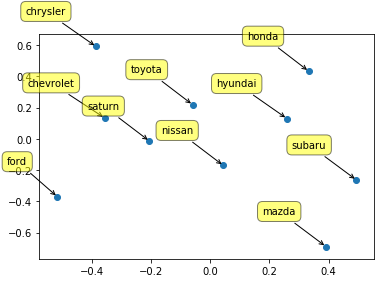

In [166]:
#4.c.MDS Plotting
from sklearn import manifold
import matplotlib.pyplot as plt
%pylab inline
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(top10_vf['brands'], coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-30, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

## Task B : Insights

**Insights to the Brand Manager of Saturn:** 

*Introduction*: The Highest Association Lift value is observed between Saturn and Chevrolet brands (5.399). Our information was extracted from a 2007 forum discussion on 'Mid-Sized' Sedans. 

*Findings & Insights*: The Mid-Sized Sedans releases of Saturn and Chevrolet in 2006-2007 were Saturn Vue 2007 and Chevrolet Equinox. Both of these brands were perceived 'similarly' by customers. Standing true to customers' perception of brands, they were brands with high similarity. They were two of the first users of 'GM Theta platform', with their 2007 versions holding GM badges, productions either owned or co-owned by GM. They had a lot of overlapping/similar features. They were even priced similarly at just a 1035 dollar difference. (Vue was priced at 24,315 and Equinox was priced at 23,280)

In the 'Product Excellence' Vs 'Cost of ownership' matrix (these 2 measures account for 91% of the difference in how customers perceive automotive brands), both of them fall in the largest middle area of 'Mass-Market' segment, like most of our other brands on the list, except that Saturn and Chevrolet were much closer to each other than the rest. Nissan also falls under this smaller region (which is also indicated by our lift index of 2.63 between Saturn and Nissan!!). Similar brands, especially in the 'Mass-Market' region, need to differentiate themselves by one or two distinctive characteristics so they can gain an edge over their competition. 

*Analysis and Recommendation:* Saturn Vue 2007 may have a lot of its features similar to Chevrolet Equinox, but their 'Safety' feature is a cleansweep!  The IIHS (Insurance Institute for Highway) rated the Vue a Good overall rating in the front offset crash test. The Equinox's first generation (2005-2009) didn't focus much on safety (this kicked in much later, in the second generation 2010-2017 versions!). In-fact one of the competitive analysis rated their 'Safety' as 9.7 as opposed to 8.2 of Equinox. But most commercials of Vue, didn't advertise 'Safety' as much. The focus was mostly on the Honda 250-horsepower 'J35A3' engine - While that was a huge advantage, it didn't do much from a customer perception of brands standpoint. Our recommendation to Saturn in 2007 would have been to position 'Safety' as one of their differentiating factors. Since Saturn's vue is in the mass-market segment, catering to a group of customers' who want to buy the most cost-effective and good performing cars, we are sure that they would consider Safety as one of their top preferences. So having such ads carrying empathetic messages like 'your safety is our priority', 'your kids are safe with us' could have been a good starting point. 

Sources: https://www.strategy-business.com/article/03302?gko=32b46
https://en.wikipedia.org/wiki/Saturn_Vue
https://en.wikipedia.org/wiki/Chevrolet_Equinox 

## Task C : What are 5 most frequently mentioned attributes of cars in the discussions? 

In [14]:
model_list=model['Brand'].unique()
def remove_brand(words):
    return [word for word in words if not word in model_list] 

file['final_words']=file['final'].apply(remove_brand)

In [15]:
#check for attributes
word_freq = nltk.FreqDist(words)
#word_freq
common_words = word_freq.most_common(1000)
#common_words

In [18]:
#read in attribute file created
attr=pd.read_csv('Attributes.csv')
#attr

In [19]:
def change_to_attr(str):
    for i in range(0,attr.shape[0]):
        str=str.replace(attr['Feature'][i].lower(),attr['Attribute'][i].lower())
    return str 

file['change_to_attr']=file['lower_message'].apply(change_to_attr)

In [20]:
stop_words = set(stopwords.words('english')) 
file['attr_words'] = file['change_to_attr'].apply(word_tokenize)
 
def remove_stopwords(word_tokens):
    return [word for word in word_tokens if not word in stop_words] 

file['final_words']=file['attr_words'].apply(remove_stopwords)

In [21]:
words_count = []
for item in file.index:
    words_count = words_count+(file['final_words'][item])

In [23]:
attr_frequency = nltk.FreqDist(words_count)
#attr_frequency

In [24]:
attr_list = attr['Attribute'].drop_duplicates().tolist()

In [25]:
common_attr = attr_frequency.most_common(3000)
top_attr = []
for (key,value) in common_attr:
    if key in attr_list:
        attr_counts = (key,value)
        top_attr.append(attr_counts)  

top_attributes = top_attr[:5]
top_attributes

[('performance', 3149),
 ('design', 2820),
 ('engine', 2058),
 ('handling', 1797),
 ('fuel', 1625)]

In [26]:
#calculate lifts of top brands and attributes 
top_brand_list=[]
for key,value in top_brands[:5]:
    top_brand_list.append(key)
    
top_brand_list

['honda', 'ford', 'toyota', 'hyundai', 'nissan']

In [27]:
top_brand_df=pd.DataFrame(columns=top_brand_list)

In [28]:
for brand in top_brand_list:
    top_brand_df[brand]=file['final'].apply(brand_lift)

In [29]:
top_attribute_list=[]
for key,value in top_attributes:
    top_attribute_list.append(key)

In [30]:
top_attribute_df=pd.DataFrame(columns=top_attribute_list)
def attr_lift(msg):
    if attr in msg:
        return 1
    else:
        return 0

In [31]:
for attr in top_attribute_list:
    top_attribute_df[attr]=file['attr_words'].apply(attr_lift)

In [32]:
lift_df=pd.DataFrame(columns=top_attribute_list)
for i in range(len(top_brand_list)):
    for j in range(len(top_attribute_list)):
        num=(top_brand_df[top_brand_list[i]]+top_attribute_df[top_attribute_list[j]]>1).sum()
        den=top_brand_df[top_brand_list[i]].sum()*top_attribute_df[top_attribute_list[j]].sum()
        lift=len(file)*num/den
        lift_df.loc[top_brand_list[i],top_attribute_list[j]]=lift

In [33]:
lift_df

,performance,design,engine,handling,fuel
honda,1.19233,1.25038,1.28869,1.21005,1.19211
ford,1.08979,1.17398,1.60476,1.3405,1.26646
toyota,1.1212,1.23354,1.36126,1.21969,1.26662
hyundai,1.13668,1.4445,1.20789,1.0926,0.998643
nissan,1.16288,1.4019,1.43964,1.25564,1.2706


Because this lift does not take into account lift with individual features, we may have included features that are not significant to any of these brands and that might affect the range of our lift values. So, we shall calculate the lift values for each of the features for these brands and drop off columns that have lift values less than 1 and recalculate brand to attribute lift.

In [71]:
attr=pd.read_csv('Attributes.csv')

In [67]:
stop_words = set(stopwords.words('english')) 
file['words_check'] = file['lower_message'].apply(word_tokenize)
 
def remove_stopwords(word_tokens):
    return [word for word in word_tokens if not word in stop_words] 

file['final_words_check']=file['words_check'].apply(remove_stopwords)

In [72]:
attribute_list=attr['Feature'].unique().tolist()

In [73]:
attribute_df=pd.DataFrame(columns=attribute_list)
def attribute_lift(msg):
    if attribute in msg:
        return 1
    else:
        return 0

In [74]:
for attribute in attribute_list:
    attribute_df[attribute]=file['final_words_check'].apply(attribute_lift)

In [75]:
lift_check_df=pd.DataFrame(columns=attribute_list)
for i in range(len(top_brand_list)):
    for j in range(len(attribute_list)):
        num_check=(top_brand_df[top_brand_list[i]]+attribute_df[attribute_list[j]]>1).sum()
        den_check=top_brand_df[top_brand_list[i]].sum()*attribute_df[attribute_list[j]].sum()
        lift_check=len(file)*num_check/den_check
        lift_check_df.loc[top_brand_list[i],attribute_list[j]]=lift_check

In [76]:
#create new attribute list excluding low lift features
lift_check_df.to_csv('test_check1.csv')

Recalculate lift with final list of attributes

In [77]:
attr=pd.read_csv('Attributes_copy.csv')

In [78]:
file['change_to_attr']=file['lower_message'].apply(change_to_attr)

In [79]:
stop_words = set(stopwords.words('english')) 
file['attr_words'] = file['change_to_attr'].apply(word_tokenize)
file['final_words']=file['attr_words'].apply(remove_stopwords)

In [80]:
words_count = []
for item in file.index:
    words_count = words_count+(file['final_words'][item])

In [81]:
attr_frequency = nltk.FreqDist(words_count)

In [82]:
attr_list = attr['Attribute'].drop_duplicates().tolist()

In [83]:
common_attr = attr_frequency.most_common(3000)
top_attr = []
for (key,value) in common_attr:
    if key in attr_list:
        attr_counts = (key,value)
        top_attr.append(attr_counts) 

top_attributes = top_attr[:5]

In [84]:
top_attribute_list=[]
for key,value in top_attributes:
    top_attribute_list.append(key)

In [85]:
top_attribute_df=pd.DataFrame(columns=top_attribute_list)
for attr in top_attribute_list:
    top_attribute_df[attr]=file['attr_words'].apply(attr_lift)

In [86]:
top_brand_list=[]
for key,value in top_brands[:5]:
    top_brand_list.append(key)

In [87]:
top_brand_df=pd.DataFrame(columns=top_brand_list)
for brand in top_brand_list:
    top_brand_df[brand]=file['final'].apply(brand_lift)

In [88]:
lift_df=pd.DataFrame(columns=top_attribute_list)
for i in range(len(top_brand_list)):
    for j in range(len(top_attribute_list)):
        num=(top_brand_df[top_brand_list[i]]+top_attribute_df[top_attribute_list[j]]>1).sum()
        den=top_brand_df[top_brand_list[i]].sum()*top_attribute_df[top_attribute_list[j]].sum()
        lift=len(file)*num/den
        lift_df.loc[top_brand_list[i],top_attribute_list[j]]=lift

In [89]:
lift_df

,design,engine,performance,pricing,size
honda,1.24936,1.32207,1.18732,1.32243,1.27729
ford,1.18609,1.6169,1.16685,1.11507,1.04366
toyota,1.25053,1.36024,1.27432,1.51285,1.37643
hyundai,1.46667,1.24388,1.29555,1.80211,1.33683
nissan,1.39982,1.48168,1.30656,1.33448,1.4288


## Task D : Insights for product and marketing managers

Overall, one would suggest product managers to focus on improving the weaknesses of their brand, and marketing managers to focus on the perceived strengths of the brand in advertising. Following this logic, we would provide the following advise to these employees of the top brands : 

Honda : Honda sees its lowest lift in performance and design - these are also in the bottom 2 lifts across brands in these categories. So we would advise a product manager to focus on producing models that are best in class in performance metrics(i.e. acceleration, speed, horsepower) and are also visually appealling to consumers. Meanwhile, the marketing managers at the brand should focus on pricing and engine in advertising as Honda sees its highest lift in these top attributes.

Ford : Ford sees its highest lift in engine and has the highest lift among the top brands in that category. Therefore, we would suggest not to make many changes to current engine offerings. However, since Ford is lowest in design across the top brands, product managers should work to cater more to consumers wanting sleek designs for their vehicles. On the other hand, the marketing managers should focus on strengths in engine in advertising while also producing campaigns focused to increase positive perception in another top category.

Toyota : Across all brands, Toyota lift is middle of the pack in every attribute. We would advise product managers to pick a focus area to increase lift in at least one attribute in order to differentiate themselves from competitors. As for marketing managers, they may want to focus advertising on its highest lift attribute, price, since Toyota does not perform amazingly well on any top attributes.

Hyundai : Hyundai performs the highest across brands in price. In fact, this pairing sees the highest lift across all brands and all attributes. On the other hand, Hyundai's lowest lift score in the engine category, is the lowest across brands in that category. So we would advise product managers to spend time producing models with enhanced engine features. Hyundai marketing manager should focus on pricing as this appears to be its major differentiator in the market.

Nissan : Nissan sees its highest lifts in size and engine, but has its lowest lift in performance. However, Nissan's lowest lift value of 1.30 is still in the top ranks of lifts across all brands and all attributes. The brand is also the top performer in terms of lift in 3 of the 5 top attributes, hinting to us that Nissan has an edge on the competition in multiple areas. Therefore, the marketing team has many options in terms of advertising focus and can even create tailored campaigns to maintain strongholds in each of its top attributes (size , performance, and engine). This also makes product managers' jobs fairly easy as it appears no vast changes need to be made to its current models.

## Task E : Which is the most aspirational brand in your data in terms of people actually wanting to buy or own?

Analysis : For this analysis, we first looked at bigrams present in our messages to determine a baseline of aspirational phrases. This list included phrases such as 'want to' and 'would like'. We then calculated individual lifts of these phrases with each brand. Then for each brand, we assess the total lift across each phrase to compare aspirational lift among brands.

In [35]:
from nltk.util import ngrams
from collections import Counter
bigrams = list(ngrams(words,2))
bigrams
bigram_frequency = nltk.FreqDist(bigrams)

In [37]:
#Assess frequent bigrams for aspirational phrases
#bigram_frequency.most_common(400)

In [38]:
asp = pd.read_csv('Aspirational words.csv')
asp_phrase = asp['Aspiration'].tolist()

In [54]:
file['words'] = file['change_to_brand'].apply(word_tokenize)

In [39]:
asp_df = pd.DataFrame(columns=asp_phrase) 

def asp_word_in_comment(msg):
    if asp in msg:
        return 1
    else:
        return 0

In [55]:
bi_gram = []
for item in file['words']:
    bigram_item = list(ngrams(item, 2))
    bigram_item2 = list(map(lambda x:x[0]+" "+x[1], bigram_item))
    bi_gram.append(bigram_item2)
file['bigram'] = bi_gram
file.head()
file['uni_bi_gram']=file['words']+file['bigram']

In [63]:
for asp in asp_phrase:
    asp_df[asp]=file['bigram'].apply(asp_word_in_comment)

In [56]:
brand_df = pd.DataFrame(columns=model_list)

def brand_in_comment(msg):
    if brand in msg:
        return 1
    else:
        return 0

In [57]:
for brand in model_list:
    brand_df[brand]=file['final'].apply(brand_in_comment)

In [64]:
#calculate lift
asp_car_lift_df=pd.DataFrame(columns=asp_phrase)

for i in range(len(model_list)):
    for j in range(len(asp_phrase)):
        num=(brand_df[model_list[i]]+asp_df[asp_phrase[j]]>1).sum()
        den=brand_df[model_list[i]].sum()*asp_df[asp_phrase[j]].sum()
        lift=len(file)*num/den
        asp_car_lift_df.loc[model_list[i],asp_phrase[j]]=lift

C:\Users\lasha\Anaconda2\envs\Python 3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [66]:
#sum and show
asp_car_lift_df.T.sum().sort_values(ascending = False)[:5]
#Lincoln the most aspirational brand

lincoln      22.703878
saturn       22.228822
chevrolet    21.937149
mercury      21.778699
subaru       21.671008
dtype: float64

Business Implications : Given that consumers in the mid-size sedan forum co-mention Lincoln and aspirational phrases the most, the leaders at Lincoln may want to position themselves at the intersection of luxury and accessibility. They want consumers to want them and perceive Lincoln as a high end brand to aspire to, but they also want consumers to think that the brand is within their reach and that they can afford the 'upgrade' to Lincoln. Ensuring that consumers consider the brand accessible to them may keep the buzz going and turn in to actual conversions as soon as that aspiring customer gets that next promotion at work, or meets their financial goals allowing themselves to make the purchase.